# **Tech-a-Intern - Data Analytics Internship**

# **TASK 2 - Analyzing COVID-19 Data**

### Author : TANAY CHOUBEY
[![alt text](https://logoeps.com/wp-content/uploads/2014/02/25231-github-cat-in-a-circle-icon-vector-icon-vector-eps.png "Git Hub Link")](https://github.com/Tanay-Choubey)

#### Problem Statement: Use publicly available COVID-19 datasets to analyze the trends and patterns related to the pandemic. Explore the data to visualize the daily cases, deaths, and recoveries over time. Compare the statistics across different countries or regions. Analyze the impact of vaccination efforts on infection rates. Create interactive dashboards to present your findings.

#### Dataset link :- https://www.kaggle.com/code/spyrosrigas/analyzing-covid-19-data-with-pyspark

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode,iplot
import warnings
warnings.filterwarnings("ignore")

### Loading & getting info about dataset

In [2]:
data = pd.read_csv('/content/owid-covid-data.csv')

In [3]:
data.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
data.shape

(176224, 67)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176224 entries, 0 to 176223
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    176224 non-null  object 
 1   continent                                   165891 non-null  object 
 2   location                                    176224 non-null  object 
 3   date                                        176224 non-null  object 
 4   total_cases                                 169905 non-null  float64
 5   new_cases                                   169680 non-null  float64
 6   new_cases_smoothed                          167685 non-null  float64
 7   total_deaths                                151828 non-null  float64
 8   new_deaths                                  151827 non-null  float64
 9   new_deaths_smoothed                         149664 non-null  float64
 

In [6]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.699050e+05,1.696800e+05,1.676850e+05,1.518280e+05,151827.000000,149664.000000,169118.000000,168893.000000,166904.000000,151054.000000,...,110341.000000,108828.000000,71500.000000,128832.000000,164738.000000,141910.000000,6.023000e+03,6023.000000,6023.000000,6023.000000
mean,2.778422e+06,1.231405e+04,1.234481e+04,6.008428e+04,168.132737,169.926112,33260.929702,179.617127,179.225894,535.809184,...,10.643637,32.784011,50.851868,3.027623,73.671614,0.725445,3.859263e+04,9.562316,15.841307,1023.021273
std,1.717614e+07,8.845232e+04,8.689349e+04,3.143783e+05,821.051479,806.451617,60613.886965,739.818055,571.615849,815.769781,...,10.580256,13.523895,31.811170,2.447388,7.464006,0.149851,1.072522e+05,16.273081,29.596734,1458.955743
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,2.226000e+03,1.000000e+00,7.000000e+00,8.400000e+01,0.000000,0.143000,661.157000,0.033000,1.627000,20.032000,...,1.900000,21.600000,20.859000,1.300000,69.590000,0.602000,-4.500000e+01,-0.455000,-0.580000,-19.127442
50%,2.941100e+04,7.900000e+01,1.080000e+02,8.230000e+02,2.000000,2.429000,5172.605000,11.348000,19.314000,142.663000,...,6.300000,31.400000,49.839000,2.400000,75.090000,0.743000,3.525700e+03,6.290000,7.420000,508.816121
75%,3.237200e+05,1.077000e+03,1.176571e+03,7.691000e+03,19.000000,21.143000,41760.105250,103.558000,125.581250,764.827250,...,19.300000,41.300000,82.502000,4.000000,79.190000,0.845000,2.611140e+04,14.610000,22.485000,1690.745408
max,4.914415e+08,4.089078e+06,3.436882e+06,6.152898e+06,18156.000000,14795.857000,706541.904000,51427.491000,16052.608000,6364.860000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.111864e+06,111.010000,375.000000,9339.469641


### Handling Missing Values

In [7]:
data.isnull().sum()

iso_code                                        0
continent                                   10333
location                                        0
date                                            0
total_cases                                  6319
                                            ...  
human_development_index                     34314
excess_mortality_cumulative_absolute       170201
excess_mortality_cumulative                170201
excess_mortality                           170201
excess_mortality_cumulative_per_million    170201
Length: 67, dtype: int64

There are so many null values in the data

In [9]:
data = data.fillna(0)

In [10]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0


In [11]:
data.isnull().sum()

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
                                          ..
human_development_index                    0
excess_mortality_cumulative_absolute       0
excess_mortality_cumulative                0
excess_mortality                           0
excess_mortality_cumulative_per_million    0
Length: 67, dtype: int64

Now our data is clean and ready to analyse

In [12]:
data.shape

(176224, 67)

In [13]:
data['date'] = pd.to_datetime(data['date'])

In [14]:
data_country = data.groupby("location").sum()

### Data Analysis and Visualisation

In [8]:
for country in np.unique(data['location']):
    df_country = data.loc[data['location']==country]
    df_country = df_country.interpolate(method='ffill')
    data.loc[data['location']==country] = df_country
    df_country = None

fig = px.choropleth(data,
                    locations="location",
                    locationmode = "country names",
                    color="total_tests_per_thousand",
                    hover_name="location",
                    animation_frame="date" ,
                    color_continuous_scale="Rainbow",
                    range_color=(0, 1000))

fig.update_layout(title_text = 'Number of people tested (per 1,000 people)',
            title_x = 0.5,
            geo=dict(
                showframe = True,
                showcoastlines = False,
            ))
fig.show()


Output hidden; open in https://colab.research.google.com to view.

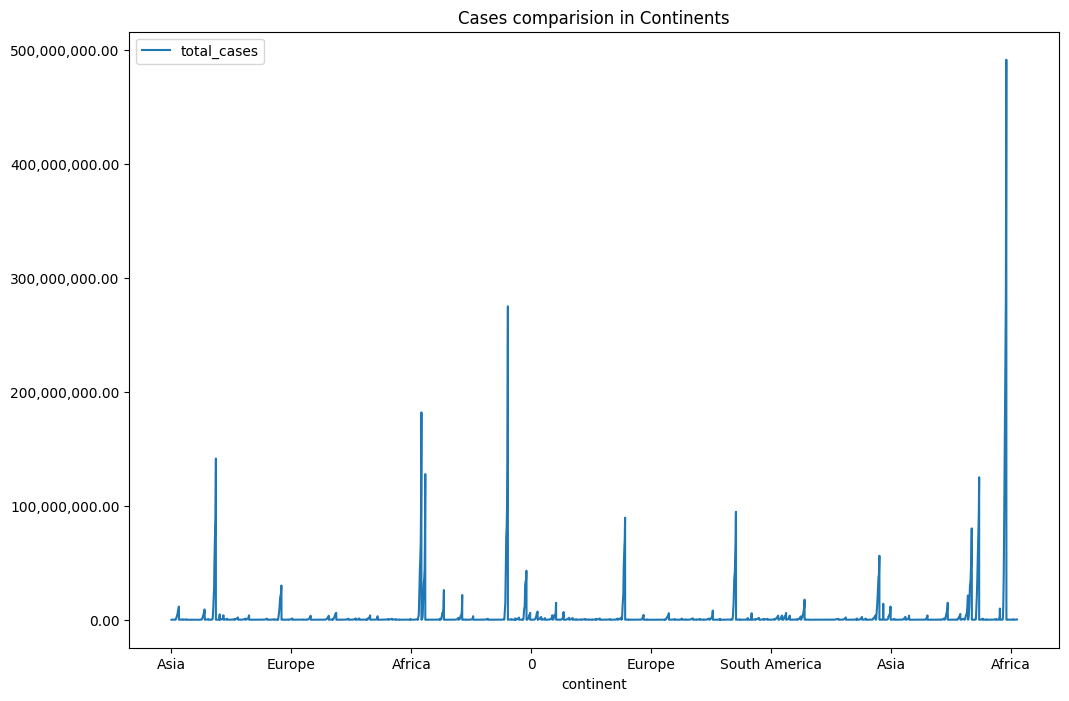

In [15]:
ax = data.plot(x= 'continent', y = 'total_cases', figsize=(12,8), title ='Cases comparision in Continents')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

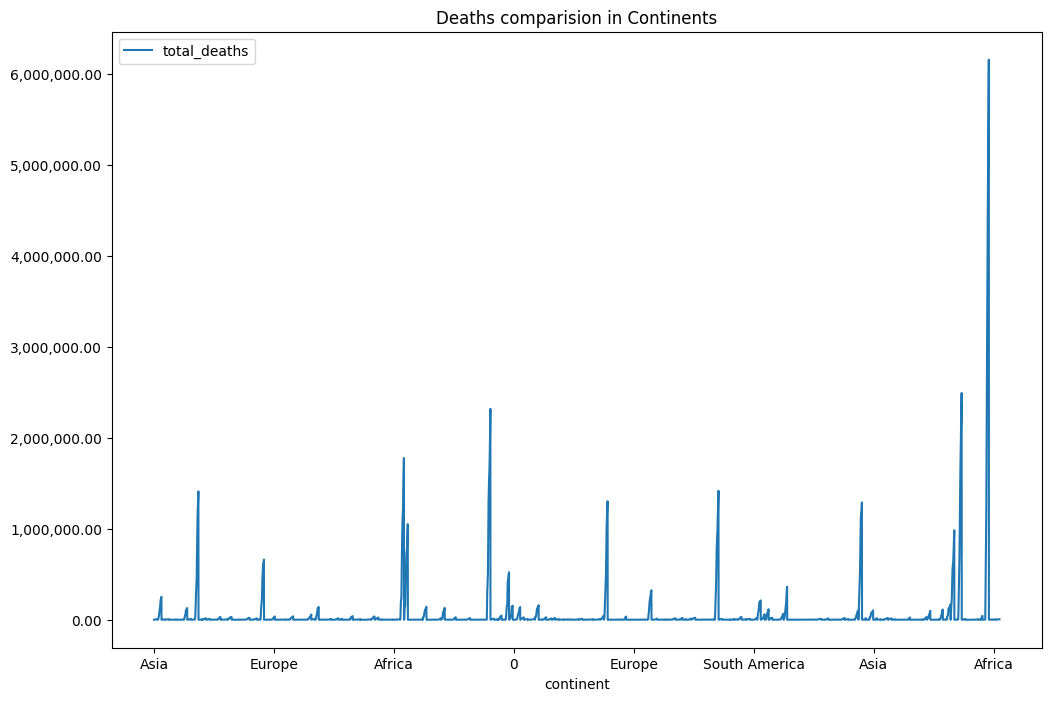

In [16]:
ax = data.plot(x= 'continent', y = 'total_deaths', figsize=(12,8) , title = 'Deaths comparision in Continents')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

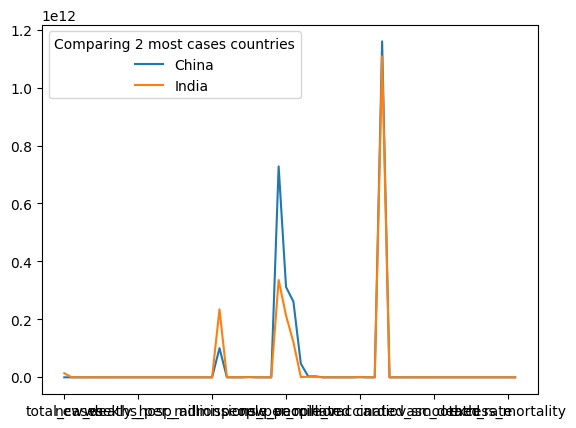

In [17]:
#Comparing 2 most cases countries

data_country.loc["China"].plot()
data_country.loc["India"].plot()
plt.legend(title = 'Comparing 2 most cases countries')

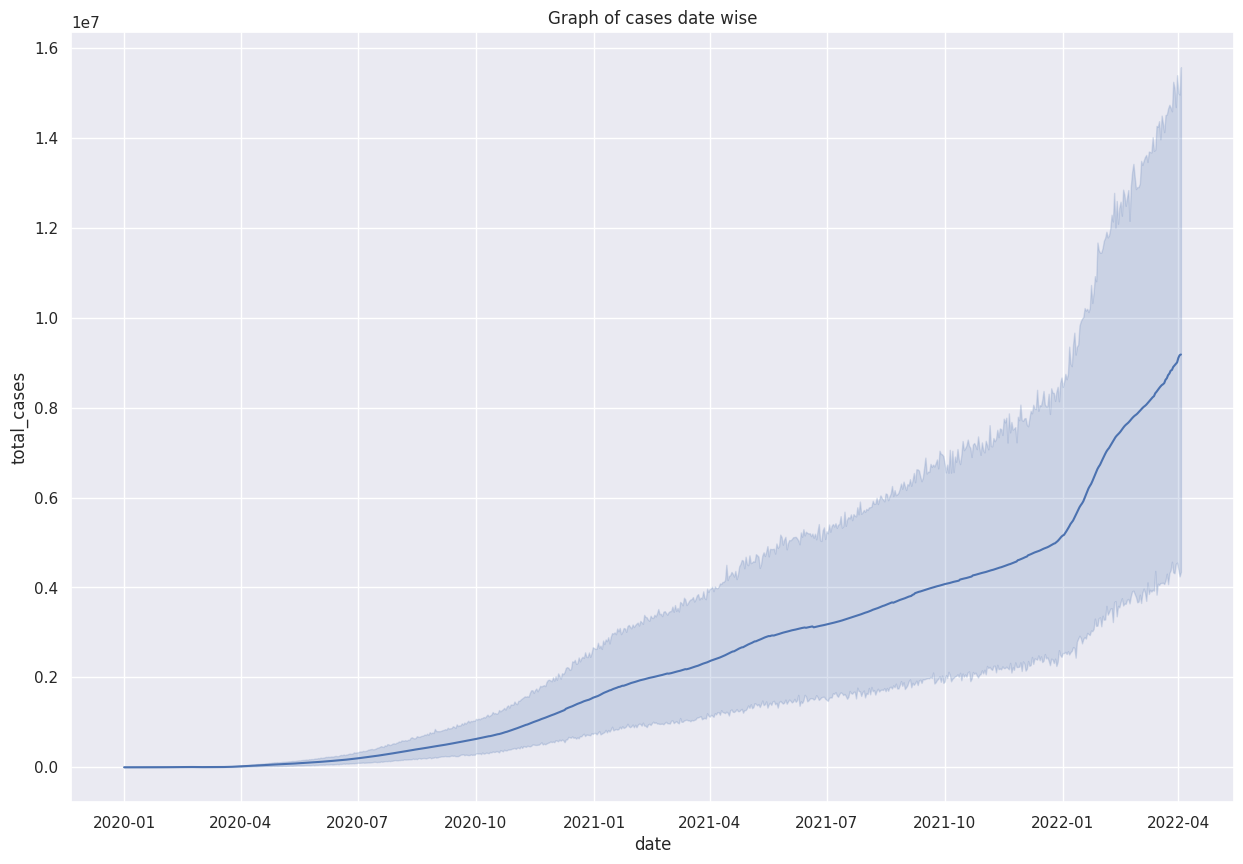

In [18]:
# Graph of cases in date wise
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="total_cases",data=data)
plt.title('Graph of cases date wise')
plt.show()

### Overall Analysis

In [19]:
data['death_rate'] = (data['new_deaths_smoothed_per_million'] / data['new_cases_smoothed_per_million']).replace(np.inf,np.nan)
data['population_coverage'] = data['total_tests'] / data['population']
data['datetime'] = pd.to_datetime(data['date'])

In [20]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode,iplot
trace1 = go.Scatter(
    x=data.groupby(['date'])['date'].apply(lambda x: np.unique(x)[0]),
    y=data.groupby(['date'])['new_tests_smoothed'].sum().astype(int),
        xaxis='x2',
    yaxis='y2',
    name = "new tests smoothed"
)
trace2 = go.Scatter(
    x=data.groupby(['date'])['date'].apply(lambda x: np.unique(x)[0]),
    y=data.groupby(['date'])['new_deaths_smoothed'].sum().astype(int),
    name = "new deaths smoothed"
)
trace3 = go.Scatter(
    x=data.groupby(['date'])['date'].apply(lambda x: np.unique(x)[0]),
    y=(data.groupby(['date'])['reproduction_rate'].mean() * 100).round(3),
    xaxis='x3',
    yaxis='y3',
    name = "test reproduction ratee %"
)
trace4 = go.Scatter(
    x=data.groupby(['date'])['date'].apply(lambda x: np.unique(x)[0]),
    y=data.groupby(['date'])['new_cases_smoothed'].sum().astype(int),
    xaxis='x4',
    yaxis='y4',
    name = "new cases smoothed"
)

data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Overall Analysis of New tests, Deaths,Cases and test positive rate'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# **--------------------------------------------Thank You--------------------------------------------**